In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
print(os.listdir(r"E:\Datasets\dogs-vs-cats"))


['sampleSubmission.csv', 'test1', 'train']


In [2]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

           file  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0
               file  category
24995  dog.9995.jpg         1
24996  dog.9996.jpg         1
24997  dog.9997.jpg         1
24998  dog.9998.jpg         1
24999  dog.9999.jpg         1


<AxesSubplot:>

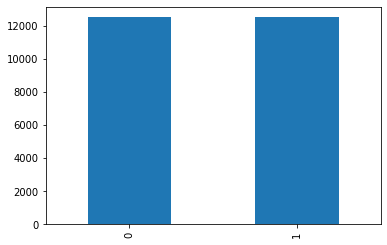

In [3]:
fileNames = os.listdir(r"E:\Datasets\dogs-vs-cats\train\train")
categories = []
for fileName in fileNames:
    category = fileName.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else: categories.append(0)
df = pd.DataFrame({'file': fileNames, 'category': categories})
print(df.head())
print(df.tail())
df['category'].value_counts().plot.bar()

cat.4326.jpg


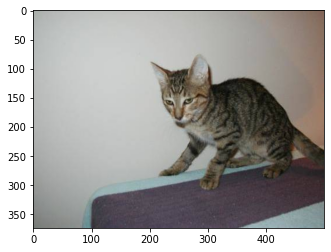

In [4]:
sample = random.choice(fileNames)
print(sample)
image = load_img(r"E:\Datasets\dogs-vs-cats\train\train\\" + sample)
plt.imshow(image)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Activation

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax')) #softmax so that model can be scaled for further categories

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0

In [6]:
from keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
earlyStopping = EarlyStopping(patience = 8)
TqdmCallback = TqdmCallback(verbose=2)
callbacks = [earlyStopping, TqdmCallback]

0epoch [00:00, ?epoch/s]

In [7]:
df.head()

,file,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [8]:
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})

df.tail()

,file,category
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog
24999,dog.9999.jpg,dog


In [9]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

(20000, 2)
(5000, 2)
            file category
0    cat.493.jpg      cat
1   dog.9112.jpg      dog
2    cat.745.jpg      cat
3  dog.11022.jpg      dog
4  dog.11363.jpg      dog


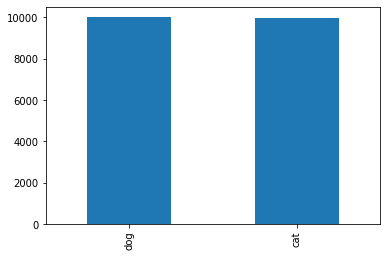

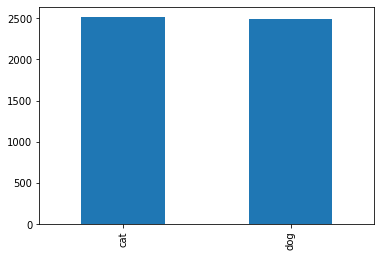

In [10]:
print(train_df.shape)
print(validate_df.shape)
print(validate_df.head())
train_df['category'].value_counts().plot.bar()
plt.show()
validate_df['category'].value_counts().plot.bar()
plt.show()

In [11]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    r"E:\Datasets\dogs-vs-cats\train\train", 
    x_col='file',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"E:\Datasets\dogs-vs-cats\train\train", 
    x_col='file',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [14]:
# testing generator
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
     r"E:\Datasets\dogs-vs-cats\train\train", 
    x_col='file',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


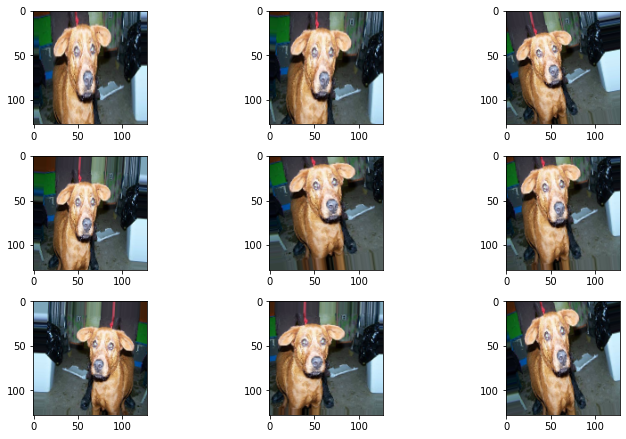

In [15]:
plt.figure(figsize=(10, 10))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [16]:
#training the model
epochs = 50
history = model.fit_generator(train_generator,
                              epochs = epochs,
                              verbose = 0,
                              validation_data = validation_generator,
                              validation_steps = total_validate // batch_size,
                              steps_per_epoch = total_train // batch_size,
                              callbacks=callbacks)

C:\Users\archi\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

  0%|          | 0.00/1.33k [00:00<?, ?batch/s]

<function matplotlib.pyplot.show(close=None, block=None)>

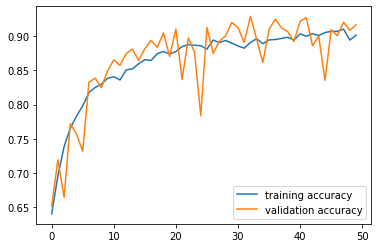

In [17]:
sns.lineplot(data = history.history['accuracy'], label = 'training accuracy')
sns.lineplot(data = history.history['val_accuracy'], label = 'validation accuracy')
plt.show

In [18]:
model.save('E:\CNNModel\model')     # filepath where the model is to be saved.
# you can also save the model in h5 format by ending your filepath in .h5 format like this:
# loaded_model.save('E:\my_model.h5')

INFO:tensorflow:Assets written to: E:\CNNModel\model\assets


In [ ]:
# Now go to the predict notebook for prediction on test images of your own!